In [18]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms,datasets
from torch.utils.data import DataLoader,random_split
import matplotlib.pyplot as plt 
from torch.optim import Adam, SGD,RMSprop
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [19]:
device = torch.device('cpu')

input_size=28*28
hidden_size=500
num_classes=10
num_epochs=2
batch_size=100
rate=.001

train_cv_dataset= datasets.MNIST(root='./data',train= True, transform= transforms.ToTensor(),download=True)  #Splitting the data for training and testing
test_dataset= datasets.MNIST(root='./data',train= False, transform= transforms.ToTensor())
length=len(train_cv_dataset)
train_length=length*.8
cv_length=length*.2
train_dataset, cv_dataset = random_split(train_cv_dataset, [int(train_length), int(cv_length)],generator=torch.Generator().manual_seed(1))

train_loader= DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)  #Loading the data with Dataloader
cv_loader= DataLoader(dataset=cv_dataset, batch_size=batch_size,shuffle=True)
test_loader= DataLoader(dataset=test_dataset, batch_size=batch_size,shuffle=False)

examples= iter(train_loader)
samples,labels=next(examples)

print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


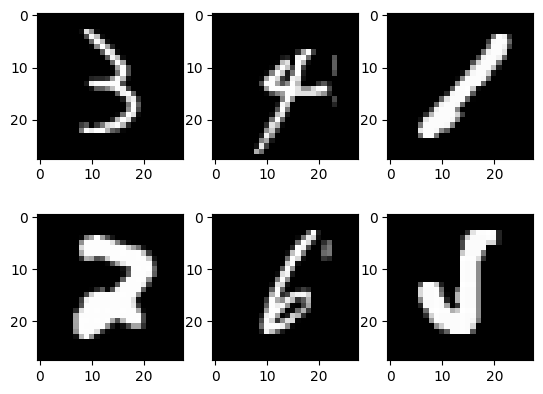

In [3]:
for i in range(6): 
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')

In [6]:
class NeuralNet1(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes): 
       super(NeuralNet1,self).__init__()
       self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model= NeuralNet1(input_size,hidden_size,num_classes).to(device)


criterion=nn.CrossEntropyLoss()                                       # Loss Function


def train(model,num_epochs, rate,optimizer): 
    optimizer=optimizer(model.parameters(),lr=rate )                  #Optimizer

    n_total_steps=len(train_loader)

    for epoch in range(num_epochs): 
        for i, (images,labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            images=images.reshape(-1,28*28)
    
            outputs=model(images)
            loss=criterion(outputs,labels)
    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step() 
    
            if (i+1)%80==0: 
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    
    with torch.no_grad():                                                      #Cross validation to fine-tune the model
        n_correct=0
        n_samples=0
        for images,labels in cv_loader: 
            images, labels = images.to(device), labels.to(device)
            images=images.reshape(-1,28*28)
            outputs=model(images)
            _,pred=torch.max(outputs,1)
            n_samples+=labels.shape[0]
            n_correct+=(pred==labels).sum().item()
    
        acc=100.0*n_correct/n_samples                 # Accuracy = % of samples correctly predicted 
        
        print(f'Validation Accuracy with Model : {model.__class__.__name__}, optimizer : {optimizer.__class__.__name__}, learning rate : {rate},Validation Accuracy: {acc:.2f}%')
        return round(acc,2)
train(model,3,.01,Adam)
train(model,3,.01,RMSprop)                 
train(model,3,.01,SGD)


Epoch [1/3], Step [80/480], Loss: 0.1513
Epoch [1/3], Step [160/480], Loss: 0.2948
Epoch [1/3], Step [240/480], Loss: 0.1672
Epoch [1/3], Step [320/480], Loss: 0.1172
Epoch [1/3], Step [400/480], Loss: 0.2174
Epoch [1/3], Step [480/480], Loss: 0.1412
Epoch [2/3], Step [80/480], Loss: 0.1758
Epoch [2/3], Step [160/480], Loss: 0.0928
Epoch [2/3], Step [240/480], Loss: 0.2956
Epoch [2/3], Step [320/480], Loss: 0.2680
Epoch [2/3], Step [400/480], Loss: 0.0692
Epoch [2/3], Step [480/480], Loss: 0.0308
Epoch [3/3], Step [80/480], Loss: 0.2648
Epoch [3/3], Step [160/480], Loss: 0.0284
Epoch [3/3], Step [240/480], Loss: 0.1221
Epoch [3/3], Step [320/480], Loss: 0.0800
Epoch [3/3], Step [400/480], Loss: 0.0383
Epoch [3/3], Step [480/480], Loss: 0.1372
Validation Accuracy with Model : NeuralNet1, optimizer : Adam, learning rate : 0.01,Validation Accuracy: 96.47%
Epoch [1/3], Step [80/480], Loss: 0.1851
Epoch [1/3], Step [160/480], Loss: 0.0018
Epoch [1/3], Step [240/480], Loss: 0.0737
Epoch [1/3

97.36

We identify SGD to be the best optimizer for this model.

In [7]:
train(model,3,.1,SGD)
train(model,3,.01,SGD)
train(model,3,.001,SGD)


Epoch [1/3], Step [80/480], Loss: 0.0076
Epoch [1/3], Step [160/480], Loss: 0.0026
Epoch [1/3], Step [240/480], Loss: 0.0847
Epoch [1/3], Step [320/480], Loss: 0.0383
Epoch [1/3], Step [400/480], Loss: 0.0520
Epoch [1/3], Step [480/480], Loss: 0.0022
Epoch [2/3], Step [80/480], Loss: 0.0119
Epoch [2/3], Step [160/480], Loss: 0.0024
Epoch [2/3], Step [240/480], Loss: 0.0065
Epoch [2/3], Step [320/480], Loss: 0.0021
Epoch [2/3], Step [400/480], Loss: 0.0006
Epoch [2/3], Step [480/480], Loss: 0.0248
Epoch [3/3], Step [80/480], Loss: 0.0049
Epoch [3/3], Step [160/480], Loss: 0.0292
Epoch [3/3], Step [240/480], Loss: 0.0020
Epoch [3/3], Step [320/480], Loss: 0.0127
Epoch [3/3], Step [400/480], Loss: 0.0044
Epoch [3/3], Step [480/480], Loss: 0.0255
Validation Accuracy with Model : NeuralNet1, optimizer : SGD, learning rate : 0.1,Validation Accuracy: 97.66%
Epoch [1/3], Step [80/480], Loss: 0.0009
Epoch [1/3], Step [160/480], Loss: 0.0051
Epoch [1/3], Step [240/480], Loss: 0.0009
Epoch [1/3],

97.68

All the learning rates give approximately same accuracy.

Now, we try adding one more linear layer to the neural network.

In [9]:
class NeuralNet2(nn.Module):
    def __init__(self,input_size, num_classes): 
        super(NeuralNet2,self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model_2= NeuralNet2(input_size,num_classes).to(device)

# loss and optimizer
criterion=nn.CrossEntropyLoss()

train(model_2,3,.01,Adam)
train(model_2,3,.01,SGD)
train(model_2,3,.01,RMSprop)



Epoch [1/3], Step [80/480], Loss: 0.3699
Epoch [1/3], Step [160/480], Loss: 0.2396
Epoch [1/3], Step [240/480], Loss: 0.1155
Epoch [1/3], Step [320/480], Loss: 0.2229
Epoch [1/3], Step [400/480], Loss: 0.1731
Epoch [1/3], Step [480/480], Loss: 0.1647
Epoch [2/3], Step [80/480], Loss: 0.0902
Epoch [2/3], Step [160/480], Loss: 0.2032
Epoch [2/3], Step [240/480], Loss: 0.1415
Epoch [2/3], Step [320/480], Loss: 0.1247
Epoch [2/3], Step [400/480], Loss: 0.2112
Epoch [2/3], Step [480/480], Loss: 0.0278
Epoch [3/3], Step [80/480], Loss: 0.0931
Epoch [3/3], Step [160/480], Loss: 0.0546
Epoch [3/3], Step [240/480], Loss: 0.1694
Epoch [3/3], Step [320/480], Loss: 0.1007
Epoch [3/3], Step [400/480], Loss: 0.1301
Epoch [3/3], Step [480/480], Loss: 0.1300
Validation Accuracy with Model : NeuralNet2, optimizer : Adam, learning rate : 0.01,Validation Accuracy: 96.30%
Epoch [1/3], Step [80/480], Loss: 0.0716
Epoch [1/3], Step [160/480], Loss: 0.0405
Epoch [1/3], Step [240/480], Loss: 0.0612
Epoch [1/3

96.69

Again, SGD comes out to be the best optimizer. Now, to decide the better model among the 2, we take average accuracy of 5 training loops on each model.

In [12]:
model_acc=[]
model_2_acc=[]

for i in range(5): 
    acc_1=train(model,2,.01,SGD)
    acc_2=train(model_2,2,.01,SGD)
    model_acc.append(acc_1)
    model_2_acc.append(acc_2)

print('Average accuracy for model 1 =',np.mean(acc_1).item())
print('Average accuracy for model 2 =',np.mean(acc_2).item())

Epoch [1/2], Step [80/480], Loss: 0.0114
Epoch [1/2], Step [160/480], Loss: 0.0297
Epoch [1/2], Step [240/480], Loss: 0.0452
Epoch [1/2], Step [320/480], Loss: 0.0127
Epoch [1/2], Step [400/480], Loss: 0.0146
Epoch [1/2], Step [480/480], Loss: 0.0001
Epoch [2/2], Step [80/480], Loss: 0.0139
Epoch [2/2], Step [160/480], Loss: 0.0001
Epoch [2/2], Step [240/480], Loss: 0.0102
Epoch [2/2], Step [320/480], Loss: 0.0639
Epoch [2/2], Step [400/480], Loss: 0.0249
Epoch [2/2], Step [480/480], Loss: 0.0091
Validation Accuracy with Model : NeuralNet1, optimizer : SGD, learning rate : 0.01,Validation Accuracy: 97.72%
Epoch [1/2], Step [80/480], Loss: 0.0180
Epoch [1/2], Step [160/480], Loss: 0.1013
Epoch [1/2], Step [240/480], Loss: 0.0134
Epoch [1/2], Step [320/480], Loss: 0.0307
Epoch [1/2], Step [400/480], Loss: 0.0072
Epoch [1/2], Step [480/480], Loss: 0.0409
Epoch [2/2], Step [80/480], Loss: 0.0220
Epoch [2/2], Step [160/480], Loss: 0.0032
Epoch [2/2], Step [240/480], Loss: 0.1267
Epoch [2/2]

So, model 2 is slightly better, in fact, the difference in the accuracy falls within the natural variation due to different training loops. Nevertheless, we finalize model 2 with SGD optimizer and learning rate .001 as our final model.

In [16]:
with torch.no_grad(): 
        n_correct=0
        n_samples=0
        optimizer=SGD(model_2.parameters(),lr=.001)
        for images,labels in test_loader: 
            images, labels = images.to(device), labels.to(device)
            images=images.reshape(-1,28*28)
            outputs=model_2(images)
            _,pred=torch.max(outputs,1)
            n_samples+=labels.shape[0]
            n_correct+=(pred==labels).sum().item()
    
        acc=100.0*n_correct/n_samples
        print(f'Test Accuracy with Model : {model.__class__.__name__}, optimizer : {optimizer.__class__.__name__}, learning rate : {rate}, {acc:.2f}%')

Test Accuracy with Model : NeuralNet1, optimizer : SGD, learning rate : 0.001, 97.67%


We obtain 97.67% accuracy on the test dataset.

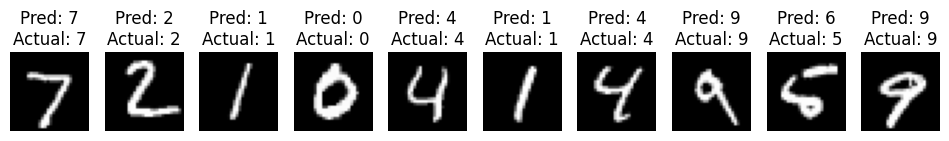

In [17]:
def visualize_predictions(model, data_loader, num_images=6):
    model.eval()
    images_shown = 0

    plt.figure(figsize=(12, 4))
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_2(images.view(images.size(0), -1))  # flatten if using MLP
            _, preds = torch.max(outputs, 1)

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    plt.show()
                    return

                plt.subplot(1, num_images, images_shown + 1)
                plt.imshow(images[i].cpu().squeeze(), cmap='gray')
                plt.title(f"Pred: {preds[i].item()}\nActual: {labels[i].item()}")
                plt.axis('off')

                images_shown += 1
visualize_predictions(model,test_loader,10)

Confusion Matrix

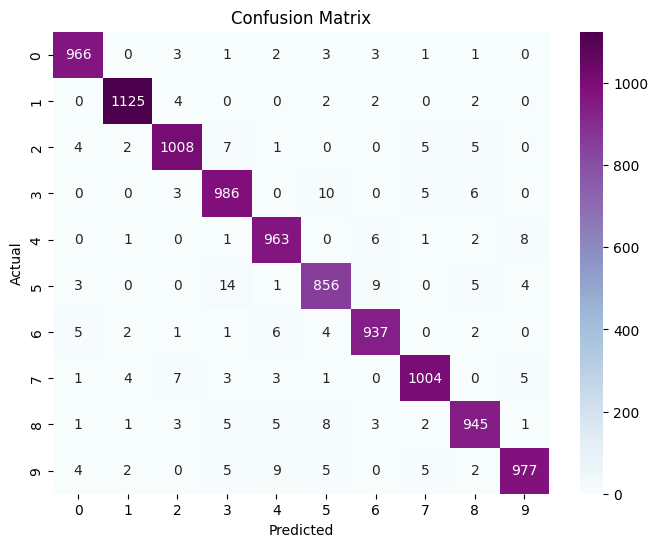

In [22]:
def get_all_preds(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images.view(images.size(0), -1))  # flatten if MLP
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)

y_true, y_pred = get_all_preds(model_2, test_loader)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



<h1>REPORT:</h1> 

**Model Architechture:**

Linear(input_size, 256)  
nn.ReLU()  
nn.Linear(256, 128)  
nn.ReLU()  
nn.Linear(128, num_classes)  

Linear function with input size of the training data and output of 256, followed by a rectified linear unit (ReLU) activation function.
Then another linear function with input and output size of 256 and 228, followed by another ReLU, then finally a linear function with 128 input 
and 10 outputs each mapping to 10 different digits.

Optimizer : SGD  
Loss function : Cross entropy loss  
Learning rate : 0.001

**Training**

The data was divided into 3 parts, in 1:6 ratio for testing and training-cross-validation, 
the larger chunk was then divided into training and cross-validation dataset in 4:1 ratio.
The model was trained in 3 epochs each with 480 steps. 

**Performance**  
The model accuracy on the test data was 97.67 percent.